## Imports

In [1]:
import pandas as pd
import numpy as np
from helpers import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv("kc_house_data.csv")

## Data Cleaning

In [2]:
for col in ['view', 'waterfront', 'yr_renovated']:
        df[col] = df[col].fillna(0)

In [3]:
df["sqft_basement"] = df.apply(replace_null_basement(df), axis = 1)

In [4]:
for col in ['waterfront', 'view', 'yr_renovated']:
    df[col] = df[col].apply(lambda x: to_int(x))

In [5]:
df['posix_date'] = df['date'].apply(lambda x: to_posix(x))

In [6]:
df['date'] = pd.to_datetime(df['date'])

## Data Overview

In [7]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,posix_date
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.413176e+09
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.418105e+09
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.424844e+09
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1.418105e+09
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1.424239e+09
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1.399871e+09
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,1.403845e+09
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1.421302e+09
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,1.429074e+09
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,1.426136e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
posix_date       21597 non-null float64
dtypes: datetime64[ns](1), float64

## Scatterplots

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


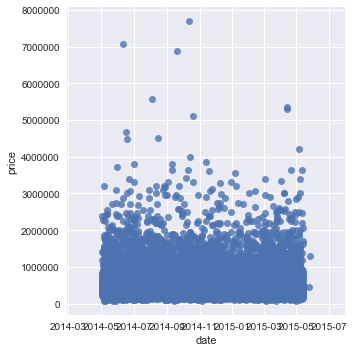

In [9]:
sns.lmplot(x="date", y="price", data=df, fit_reg=False)

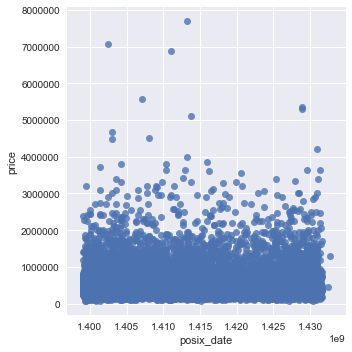

In [10]:
sns.lmplot(x="posix_date", y="price", data=df, fit_reg=False)

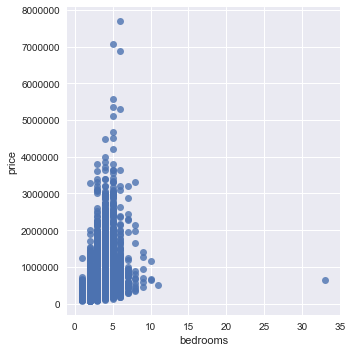

In [11]:
sns.lmplot(x="bedrooms", y="price", data=df, fit_reg=False)

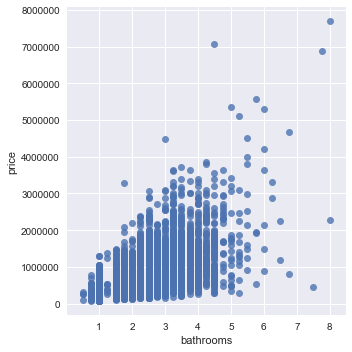

In [12]:
sns.lmplot(x="bathrooms", y="price", data=df, fit_reg=False)

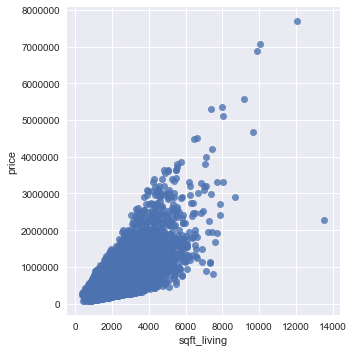

In [13]:
sns.lmplot(x="sqft_living", y="price", data=df, fit_reg=False)

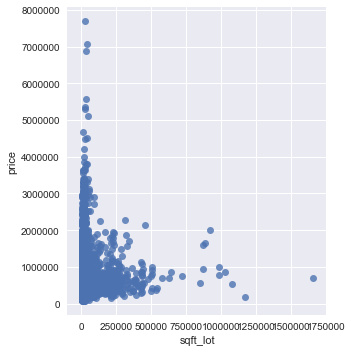

In [14]:
sns.lmplot(x="sqft_lot", y="price", data=df, fit_reg=False)

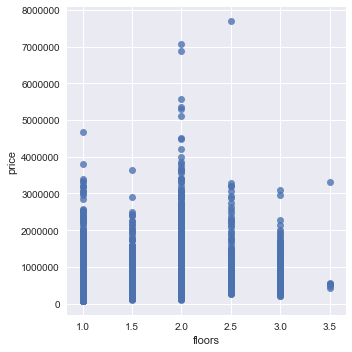

In [15]:
sns.lmplot(x="floors", y="price", data=df, fit_reg=False)

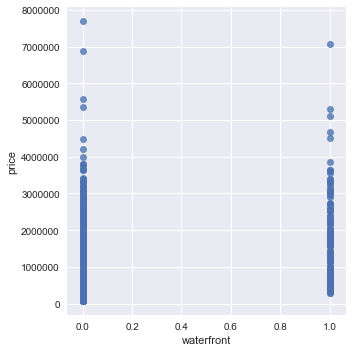

In [16]:
sns.lmplot(x="waterfront", y="price", data=df, fit_reg=False)

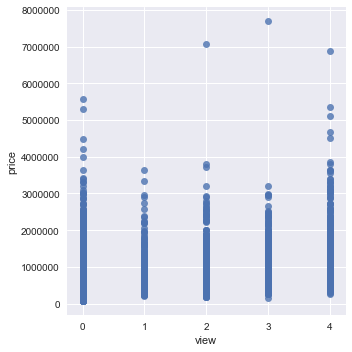

In [17]:
sns.lmplot(x="view", y="price", data=df, fit_reg=False)

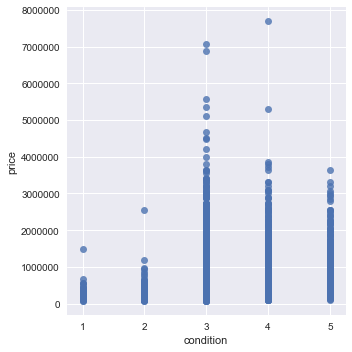

In [18]:
sns.lmplot(x="condition", y="price", data=df, fit_reg=False)

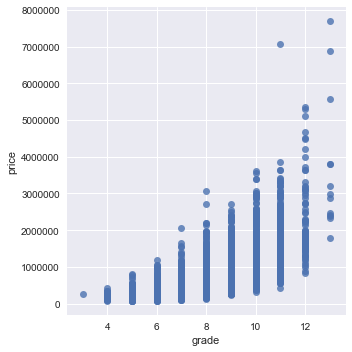

In [19]:
sns.lmplot(x="grade", y="price", data=df, fit_reg=False)

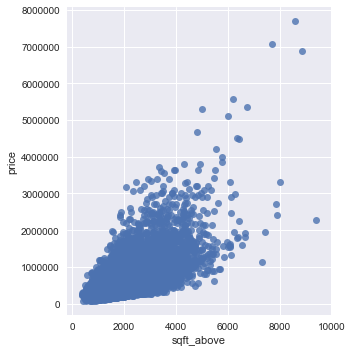

In [20]:
sns.lmplot(x="sqft_above", y="price", data=df, fit_reg=False)

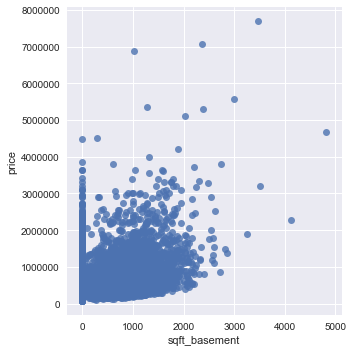

In [21]:
sns.lmplot(x="sqft_basement", y="price", data=df, fit_reg=False)

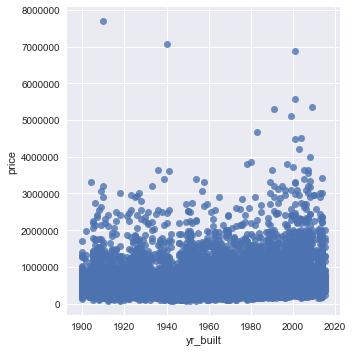

In [22]:
sns.lmplot(x="yr_built", y="price", data=df, fit_reg=False)

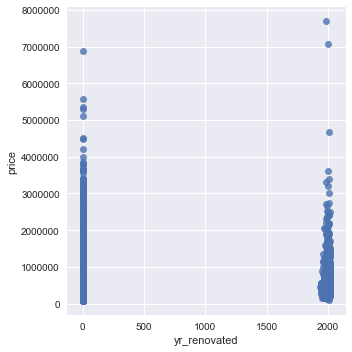

In [23]:
sns.lmplot(x="yr_renovated", y="price", data=df, fit_reg=False)

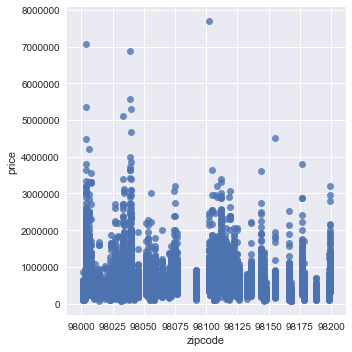

In [24]:
sns.lmplot(x="zipcode", y="price", data=df, fit_reg=False)

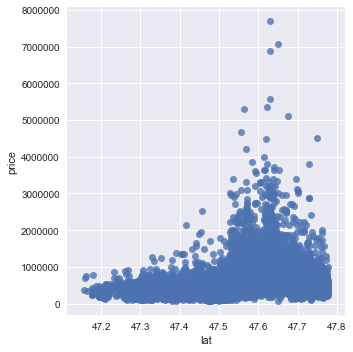

In [25]:
sns.lmplot(x="lat", y="price", data=df, fit_reg=False)

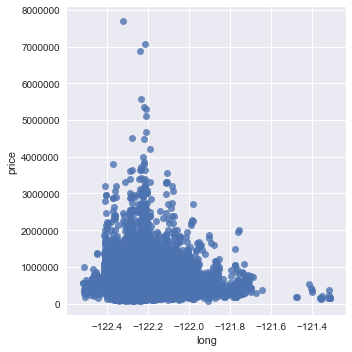

In [26]:
sns.lmplot(x="long", y="price", data=df, fit_reg=False)

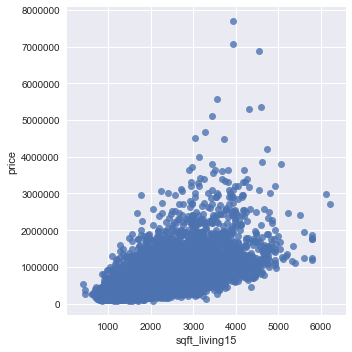

In [27]:
sns.lmplot(x="sqft_living15", y="price", data=df, fit_reg=False)

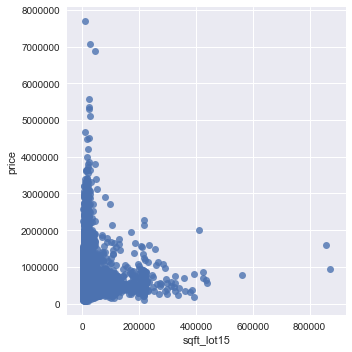

In [28]:
sns.lmplot(x="sqft_lot15", y="price", data=df, fit_reg=False)